<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\daisy\AppData\Local\Temp\ipykernel_7880\367195200.py:5: SyntaxWarning: invalid escape sequence '\S'
  DB = {"servername": "DESKTOP-OF0CT86\SQLEXPRESS",
C:\Users\daisy\AppData\Local\Temp\ipykernel_7880\367195200.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM SALES_TargetData", export_conn)
C:\Users\daisy\AppData\Local\Temp\ipykernel_7880\367195200.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order_df = pd.read_sql("SELECT * FROM Orders", export_conn)


order_number                                 1354
retailer_name                   Falcon Outfitters
order_date                             2021-05-23
order_day                                      23
order_month                                     5
order_year                                   2021
order_detail_code                           48492
order_detail_product_number                     2
order_detail_quantity                         244
order_detail_unit_cost                        9.0
order_detail_unit_price                      12.0
order_detail_unit_sale_price                 11.0
return_code                                  None
return_date                            1970-01-01
return_reason_code                           None
return_quantity                              None
order_method_code                               7
sales_staff_code                               50
sales_branch_code                              18
retailer_site_code                             19


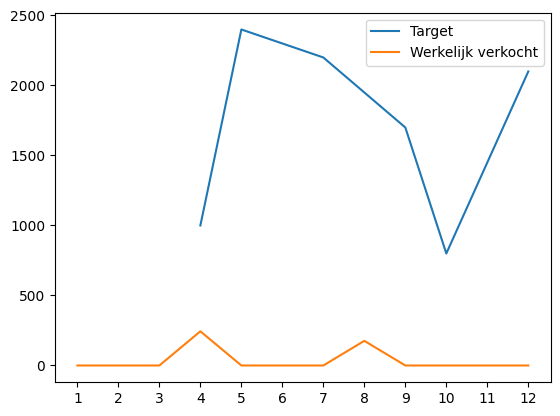

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import pyodbc
import numpy as np
DB = {"servername": "DESKTOP-OF0CT86\SQLEXPRESS",
      "database": "greatoutdoors"}

export_conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + DB['servername'] + 
                             ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')


df = pd.read_sql("SELECT * FROM SALES_TargetData", export_conn)
order_df = pd.read_sql("SELECT * FROM Orders", export_conn)

# Plot 1 (2020)
year = 2021

c = df['SALES_YEAR'] == year
periods = df.loc[c, 'SALES_PERIOD'].drop_duplicates().to_list()
periods.sort()
# print(periods)

x_axis_periods = periods
y_axis_amount_target = 0


# Per product       -       ID: 10
# Per Sales Staff   -       ID: 20

# staff_condition = 
# product_condition = 



staff_code_num = 50
product_num = 2

df = df.sort_values(by=['SALES_PERIOD'])
current_target, period = df.loc[(df['SALES_STAFF_CODE'] == staff_code_num) & (df['PRODUCT_NUMBER'] == product_num), "SALES_TARGET"], df.loc[(df['SALES_STAFF_CODE'] == staff_code_num) & (df['PRODUCT_NUMBER'] == product_num), 'SALES_PERIOD']


order_cond = (order_df['order_year'] == year) & (order_df['sales_staff_code'] == staff_code_num) & (order_df['order_detail_product_number'] == product_num)


order_details = order_df.loc[order_cond, :].sort_values(by=['order_month'])


total_amount_bought_list = [0,0,0,0,0,0,0,0,0,0,0,0]

for index, row in order_details.iterrows():
    print(row)

    order_m = row['order_month'] - 1
    print(order_m)
    total_amount_bought_list[order_m - 1] += row['order_detail_quantity']


print(total_amount_bought_list)
plt.xticks(np.arange(1, 13, step=1))
plt.plot(period, current_target, label = "Target")
plt.plot(range(1,13),total_amount_bought_list,  label = "Werkelijk verkocht") 

plt.legend()